# Mounting Google Drive to Collab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importing all Libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
#printing the number of dataset fro test and train 
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Create a dataset

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
##  Declaring  train dataset here
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Declaring validation dataset here
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data

In [10]:
import matplotlib.pyplot as plt

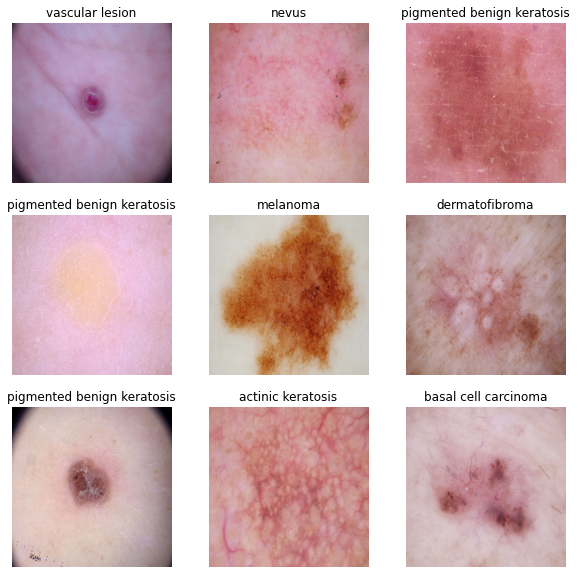

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

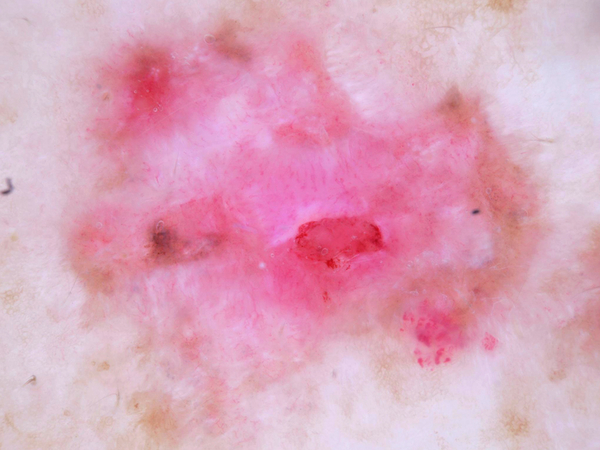

In [12]:
squamous_cell_carcinoma = list(data_dir_train.glob('squamous cell carcinoma/*'))
PIL.Image.open(str(squamous_cell_carcinoma[0]))

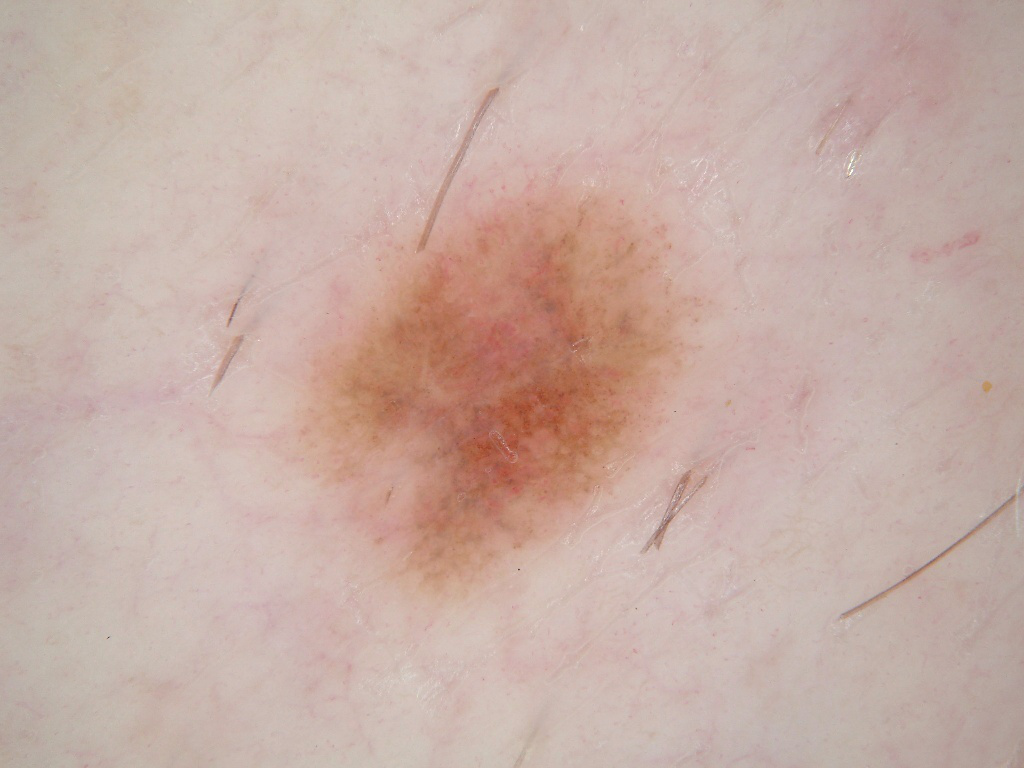

In [13]:
seborrheic_keratosis= list(data_dir_train.glob('seborrheic keratosis/*'))
PIL.Image.open(str(seborrheic_keratosis[0]))

- Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
- Dataset.prefetch() overlaps data preprocessing and model execution while training.



In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model

- Create a CNN model, which can accurately detect 9 classes present in the dataset.
- Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. 
- This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [15]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

In [16]:
### To choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

# Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 655s 3s/step - loss: 2.2917 - accuracy: 0.2014 - val_loss: 1.7491 - val_accuracy: 0.4385
Epoch 2/20
56/56 [==============================] - 1s 14ms/step - loss: 1.6803 - accuracy: 0.4164 - val_loss: 1.5902 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 1s 14ms/step - loss: 1.5702 - accuracy: 0.4450 - val_loss: 1.4289 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 1s 14ms/step - loss: 1.3906 - accuracy: 0.5076 - val_loss: 1.4356 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 1s 14ms/step - loss: 1.2955 - accuracy: 0.5262 - val_loss: 1.3862 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 1s 14ms/step - loss: 1.1818 - accuracy: 0.5776 - val_loss: 1.4154 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 1s 14ms/step - loss: 1.1067 - accuracy: 0.6141 - val_loss: 1.6111 - val_accuracy: 0.4787
Epoch 8/20
56

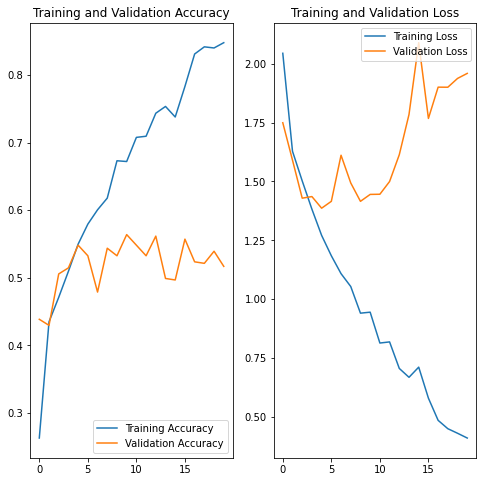

In [19]:
# Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 51% accuracy on the validation set.
- This is clearly the case of overfitting so we will do the data augmentation
- When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. 
- This phenomenon is known as overfitting. 
- It means that the model will have a difficult time generalizing on a new dataset.

# Data augmentation

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

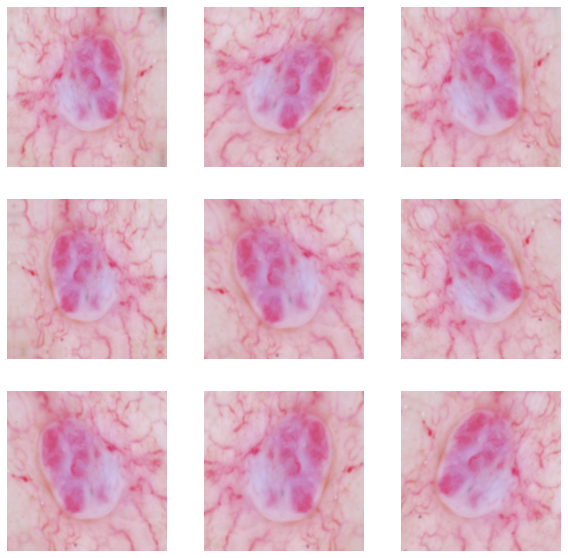

In [21]:
#Visualizing the augmented dataset images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Dropout

- Another technique to reduce overfitting is to introduce Dropout to the network, a form of regularization.
- Let's create a new neural network using layers.Dropout, then train it using augmented images.

In [22]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compiling the model

In [23]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
#understanding the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

## training the model

In [25]:
#Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 21ms/step - loss: 2.0479 - accuracy: 0.2207 - val_loss: 1.7882 - val_accuracy: 0.3803
Epoch 2/20
56/56 [==============================] - 1s 18ms/step - loss: 1.6688 - accuracy: 0.4272 - val_loss: 1.4889 - val_accuracy: 0.4922
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4300 - accuracy: 0.4950 - val_loss: 1.5296 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4293 - accuracy: 0.4862 - val_loss: 1.4217 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4223 - accuracy: 0.4968 - val_loss: 1.3779 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4180 - accuracy: 0.4945 - val_loss: 1.4771 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 1s 18ms/step - loss: 1.3102 - accuracy: 0.5304 - val_loss: 1.4535 - val_accuracy: 0.4899
Epoch 8/20
56

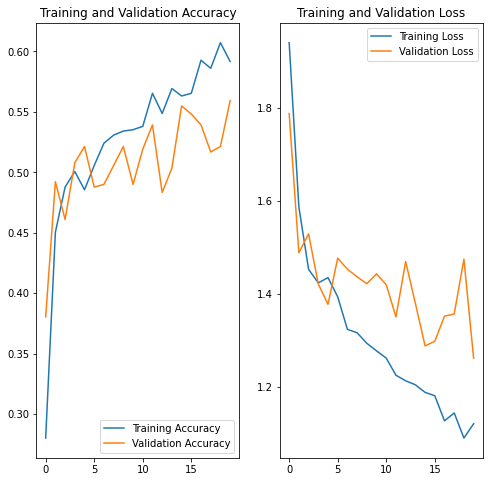

In [26]:
# Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- As you can see from the plots, training accuracy and validation accuracy are is better and the model has achieved only around 55% accuracy on the validation set.
- After the augmented data definitely the accuracy is better than the model build on fewer data .
- In the above plot we can see the training and the Validation accuracy goes towards the same direction but due to uneven distribution of the data the model accuracy is low.

## Find the distribution of classes in the training dataset

In [27]:
d={}
for i in class_names:
  d[i]=len(list(data_dir_train.glob(i+'/*')))
d

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

In [ ]:
- we can notice that the data are not evenly distributed.
- The class "dermatofibroma" has the least number of samples.
- squamous cell carcinoma': 181,basal cell carcinoma': 376,'nevus': 357, looks somewhere near to proportionate in  samples.


## Rectify the class imbalance

In [28]:
!pip install Augmentor

In [29]:
path_to_training_dataset=str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6323267290>:   0%|          | 1/500 [00:00<00:53,  9.29 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F639184B750>: 100%|██████████| 500/500 [00:20<00:00, 24.83 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6391877910>: 100%|██████████| 500/500 [00:19<00:00, 25.07 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63203EA250>: 100%|██████████| 500/500 [00:20<00:00, 24.70 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6391868E10>: 100%|██████████| 500/500 [01:22<00:00,  6.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F6391926690>: 100%|██████████| 500/500 [01:22<00:00,  6.08 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F632325EC90>: 100%|██████████| 500/500 [00:20<00:00, 24.93 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F63917B8F90>: 100%|██████████| 500/500 [00:42<00:00, 11.82 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63203D4DD0>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63917A3150>: 100%|██████████| 500/500 [00:20<00:00, 24.70 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F639182BBD0>: 100%|██████████| 500/500 [00:20<00:00, 24.53 Samples/s]


- Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types..
-  Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


## Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027829.jpg_3f55fd9f-ff71-4882-b498-b28ae063f8ea.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027447.jpg_c14acda4-3218-463b-be62-da9cdaa0b083.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026171.jpg_06c6d6da-d23d-4e3a-875f-9246ce0e3e16.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026212.jpg_8233c9a8-2718-4f84-a7ea-ecfc5fb46344.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026525.jpg_fa5fe4eb-9284

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [35]:
df2['Label'].value_counts()

pigmented benign keratosis    500
seborrheic keratosis          500
dermatofibroma                500
actinic keratosis             500
nevus                         500
melanoma                      500
squamous cell carcinoma       500
basal cell carcinoma          500
vascular lesion               500
Name: Label, dtype: int64

- So, now we have added 500 images to all the classes to maintain some class balance. 
- We can add more images as we want to improve training process.

# train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

# Create a training dataset

In [37]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  label_mode="categorical",
  image_size=(img_height,img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


# Create a validation dataset

In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Create your model ( including  normalization)

In [39]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

# Compiling the model

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
#summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)       

# Training the model

In [42]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/50
169/169 [==============================] - 47s 262ms/step - loss: 4.5279 - accuracy: 0.3149 - val_loss: 5.7711 - val_accuracy: 0.1871
Epoch 2/50
169/169 [==============================] - 44s 253ms/step - loss: 1.3139 - accuracy: 0.5216 - val_loss: 5.3274 - val_accuracy: 0.1514
Epoch 3/50
169/169 [==============================] - 44s 250ms/step - loss: 1.0418 - accuracy: 0.6195 - val_loss: 2.6883 - val_accuracy: 0.4053
Epoch 4/50
169/169 [==============================] - 43s 246ms/step - loss: 0.8583 - accuracy: 0.6789 - val_loss: 2.7809 - val_accuracy: 0.4321
Epoch 5/50
169/169 [==============================] - 43s 250ms/step - loss: 0.6575 - accuracy: 0.7630 - val_loss: 0.8229 - val_accuracy: 0.7149
Epoch 6/50
169/169 [==============================] - 43s 250ms/step - loss: 0.5319 - accuracy: 0.8120 - val_loss: 1.3410 - val_accuracy: 0.6036
Epoch 7/50
169/169 [==============================] - 43s 247ms/step - loss: 0.4670 - accuracy: 0.8352 - val_loss: 0.7042 - val_ac

# Visualize the model results

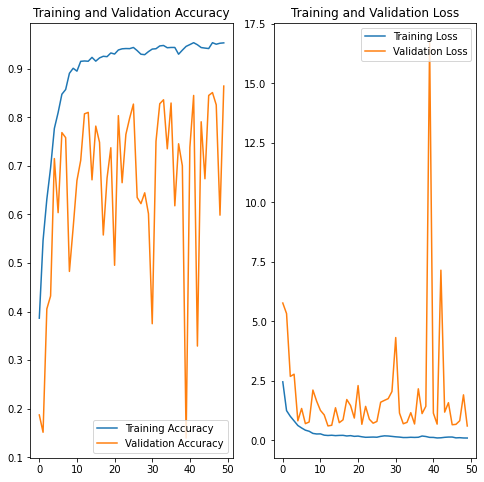

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- The model above with the above accuracy 94% and on validation accuracy as 86% is surely better than the model build before during data Augmentation .Overfitting generally occurs when there are a small number of training examples.Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images.This helps expose the model to more aspects of the data and generalize better.

- *The model with epoch 30 was still showing low accuracy as compared to the epoch=50 and also showing some overfitting ,so went with the epoch=50*
- *The more the number of epochs, the more the parameters are adjusted thus resulting in a better performing model.However, too many epochs might lead to overfitting. If a model is overfitted, it does well in the train data and performs poorly on the test data.*

- The Normalization and the regularization with the increase number of layers have definitely improved the performance of the model 
- By reducing the class imbalance the accuracy of the model shown some accuracy.
- The inital model were clearly overfitting as there were very less data but eventually with the class balancing and regualirsing the accuracy is much better . 
- CNN model works on millions of data , with fewer data definitely it tends to make model overfitting , But the regularization,epoch=50  and increasing the layers have helped a bit to improve a lot in the models performance .

# Thank you !